In [33]:
import numpy as np
import array as arr
import matplotlib.pyplot as plt
from scipy import signal
import Hockney
import copy

class PoissonSolver:
    def __init__(self):
        self.data = []
        
    def __init__(self, a_dx, a_M, Center = None):
        self._m_dx = a_dx;
        self._m_M = a_M;
        
    def solve(self, RHSArray, fullGrid = True):
        
        if (not fullGrid):
            #pad array with zeros to be full
            #This isn't correct but I don't want to deal with this right now
            inputArray = copy.deepcopy(RHSArray);
        else:
            #Not necessary to do a deep copy here but I want to momentarily be transparent about data being overwritten 
            inputArray = copy.deepcopy(RHSArray);
        
        Hockney.convolve(self._m_dx, self._m_M, inputArray)
        
        return inputArray

    
def cosineBell(r):
    power = 8
    if r < r0:
        return np.cos(np.pi/2*r)**power
    else: 
        return 0.0
    
def gaussianCharge(r):
     if r < r0:
        return np.sqrt(2/np.pi)*np.exp(-1/2*(r)**2)
     else: 
        return 0.0
    
def pointCharge(r):
    if r == 0:
        return 1.0
    else: 
        return 0.0
    
M = 3
gridSize = 2**M
L = 1
xCen = L/2
yCen = xCen
r0 = L/8
    
x_grid = np.linspace(0, L, gridSize+1)
print(x_grid.shape)
dx = np.abs(x_grid[0] - x_grid[1])
print(dx)

(9,)
0.125


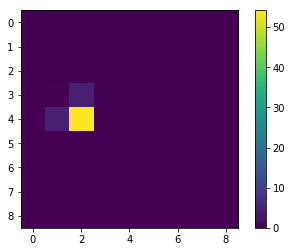

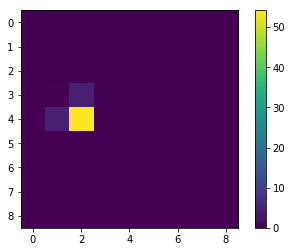

In [36]:
RHSArray = np.zeros((gridSize+1, gridSize+1))

rhsRead = np.loadtxt("rhs.txt", delimiter=" ")

for line in np.arange(0, len(rhsRead)):
    RHSArray[int(float(rhsRead[line][0])/dx), int(float(rhsRead[line][1])/dx)] = float(rhsRead[line][2])
plt.imshow(RHSArray)
plt.colorbar(orientation='vertical')
plt.show()

RHSArray2 = np.zeros((gridSize+1, gridSize+1))
rhsRead2 = np.loadtxt("rhsWrapped.txt", delimiter=" ")

for line in np.arange(0, len(rhsRead2)):
    RHSArray2[int(float(rhsRead2[line][0])/dx), int(float(rhsRead2[line][1])/dx)] = float(rhsRead2[line][2])
plt.imshow(RHSArray2)
plt.colorbar(orientation='vertical')
plt.show()

[[-8. -8.  0.  0.]
 [-7. -8.  0.  0.]
 [-6. -8.  0.  0.]
 ...
 [ 6.  8.  0.  0.]
 [ 7.  8.  0.  0.]
 [ 8.  8.  0.  0.]]


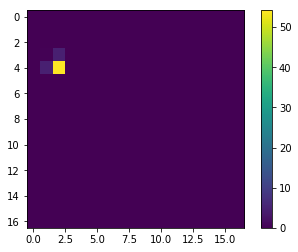

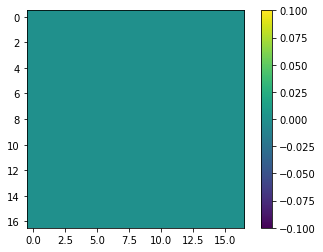

[[-8. -8.  0.  0.]
 [-7. -8.  0.  0.]
 [-6. -8.  0.  0.]
 ...
 [ 6.  8.  0.  0.]
 [ 7.  8.  0.  0.]
 [ 8.  8.  0.  0.]]


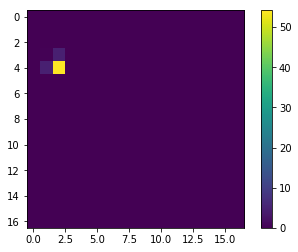

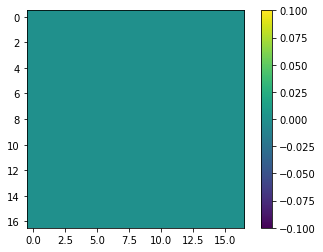

In [39]:
RHSDoubleArray_cpp = np.zeros((gridSize*2+1, gridSize*2+1), dtype=np.complex_)

rhsRead = np.loadtxt("RHSDouble.txt", delimiter=" ")

print(rhsRead)
for line in np.arange(0, len(rhsRead)):
    RHSDoubleArray_cpp[int(rhsRead[line][0]), int(rhsRead[line][1])] = complex(rhsRead[line][2] + rhsRead[line][3]*1j) 

plt.imshow(np.real(RHSDoubleArray_cpp))
plt.colorbar(orientation='vertical')
plt.show()
plt.imshow(np.imag(RHSDoubleArray_cpp))
plt.colorbar(orientation='vertical')
plt.show()



RHSDoubleArray2_cpp = np.zeros((gridSize*2+1, gridSize*2+1), dtype=np.complex_)

rhsRead = np.loadtxt("RHSDoubleWrapped.txt", delimiter=" ")

print(rhsRead)
for line in np.arange(0, len(rhsRead)):
    RHSDoubleArray2_cpp[int(rhsRead[line][0]), int(rhsRead[line][1])] = complex(rhsRead[line][2] + rhsRead[line][3]*1j) 

plt.imshow(np.real(RHSDoubleArray2_cpp))
plt.colorbar(orientation='vertical')
plt.show()
plt.imshow(np.imag(RHSDoubleArray2_cpp))
plt.colorbar(orientation='vertical')
plt.show()

[[ -8.          -8.          45.1584       0.        ]
 [ -7.          -8.          -1.64584491 -45.48577891]
 [ -6.          -8.         -46.41807516   3.04112484]
 ...
 [  6.           8.           0.           0.        ]
 [  7.           8.           0.           0.        ]
 [  8.           8.           0.           0.        ]]


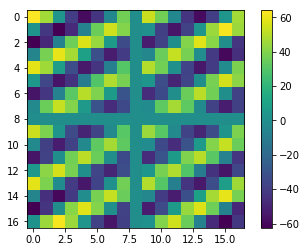

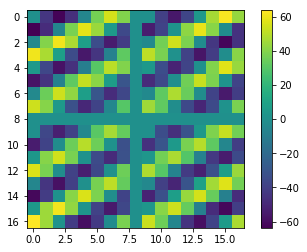

[[ -8.          -8.          45.1584       0.        ]
 [ -7.          -8.          -1.64584491 -45.48577891]
 [ -6.          -8.         -46.41807516   3.04112484]
 ...
 [  6.           8.           0.           0.        ]
 [  7.           8.           0.           0.        ]
 [  8.           8.           0.           0.        ]]


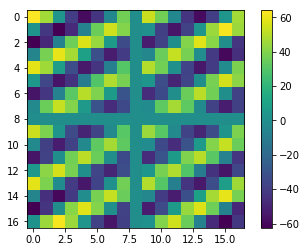

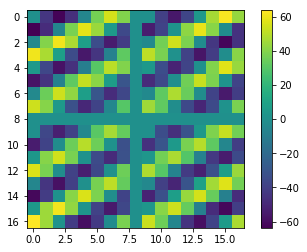

In [40]:
RHSDoubleArrayFFT_cpp = np.zeros((gridSize*2+1, gridSize*2+1), dtype=np.complex_)

rhsRead = np.loadtxt("RHSDoubleFFT.txt", delimiter=" ")

print(rhsRead)
for line in np.arange(0, len(rhsRead)):
    RHSDoubleArrayFFT_cpp[int(rhsRead[line][0]), int(rhsRead[line][1])] = complex(rhsRead[line][2] + rhsRead[line][3]*1j) 

plt.imshow(np.real(RHSDoubleArrayFFT_cpp))
plt.colorbar(orientation='vertical')
plt.show()
plt.imshow(np.imag(RHSDoubleArrayFFT_cpp))
plt.colorbar(orientation='vertical')
plt.show()



RHSDoubleArrayFFT2_cpp = np.zeros((gridSize*2+1, gridSize*2+1), dtype=np.complex_)

rhsRead = np.loadtxt("RHSDoubleFFTWrapped.txt", delimiter=" ")

print(rhsRead)
for line in np.arange(0, len(rhsRead)):
    RHSDoubleArrayFFT2_cpp[int(rhsRead[line][0]), int(rhsRead[line][1])] = complex(rhsRead[line][2] + rhsRead[line][3]*1j) 

plt.imshow(np.real(RHSDoubleArrayFFT2_cpp))
plt.colorbar(orientation='vertical')
plt.show()
plt.imshow(np.imag(RHSDoubleArrayFFT2_cpp))
plt.colorbar(orientation='vertical')
plt.show()

[[-8.         -8.         -0.85780513  0.        ]
 [-7.         -8.         -0.85551932  0.        ]
 [-6.         -8.         -0.84378387  0.        ]
 ...
 [ 6.          8.         -0.0710288   0.        ]
 [ 7.          8.         -0.09048034  0.        ]
 [ 8.          8.         -0.1103178   0.        ]]


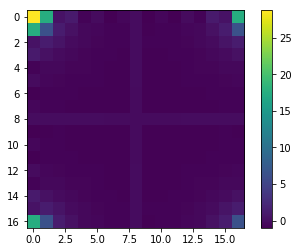

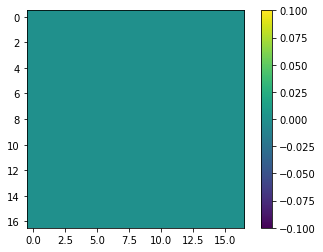

[[-8.         -8.         -0.32489875  0.        ]
 [-7.         -8.         -0.29567715  0.02910474]
 [-6.         -8.         -0.31778919  0.04908026]
 ...
 [ 6.          8.         -0.0355144   0.        ]
 [ 7.          8.         -0.04524017  0.        ]
 [ 8.          8.         -0.0551589   0.        ]]


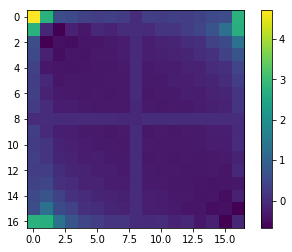

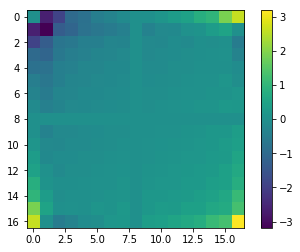

In [41]:
Kernel_cpp = np.zeros((gridSize*2+1, gridSize*2+1), dtype=np.complex_)

rhsRead = np.loadtxt("Kernel.txt", delimiter=" ")

print(rhsRead)
for line in np.arange(0, len(rhsRead)):
    Kernel_cpp[int(rhsRead[line][0]), int(rhsRead[line][1])] = complex(rhsRead[line][2] + rhsRead[line][3]*1j) 

plt.imshow(np.real(Kernel_cpp))
plt.colorbar(orientation='vertical')
plt.show()
plt.imshow(np.imag(Kernel_cpp))
plt.colorbar(orientation='vertical')
plt.show()



Kernel2_cpp = np.zeros((gridSize*2+1, gridSize*2+1), dtype=np.complex_)

rhsRead = np.loadtxt("KernelWrapped.txt", delimiter=" ")

print(rhsRead)
for line in np.arange(0, len(rhsRead)):
    Kernel2_cpp[int(rhsRead[line][0]), int(rhsRead[line][1])] = complex(rhsRead[line][2] + rhsRead[line][3]*1j) 

plt.imshow(np.real(Kernel2_cpp))
plt.colorbar(orientation='vertical')
plt.show()
plt.imshow(np.imag(Kernel2_cpp))
plt.colorbar(orientation='vertical')
plt.show()

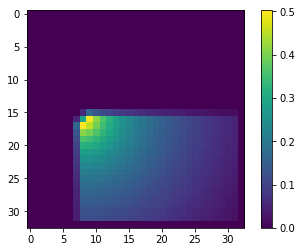

In [30]:
PS = PoissonSolver(dx, M)
soln = PS.solve(RHSArray)

plt.imshow(soln)
plt.colorbar(orientation='vertical')
plt.show()

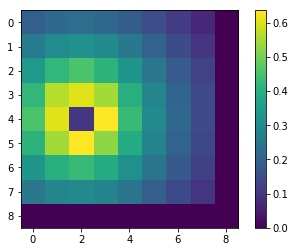

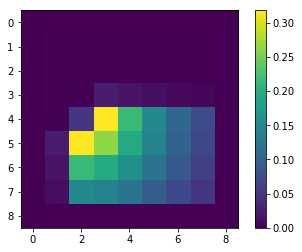

In [37]:
SolnArray = np.zeros((gridSize+1, gridSize+1))

solnRead = np.loadtxt("soln.txt", delimiter=" ")

for line in np.arange(0, len(solnRead)):
    SolnArray[int(float(solnRead[line][0])/dx), int(float(solnRead[line][1])/dx)] = float(solnRead[line][2])
plt.imshow(SolnArray)
plt.colorbar(orientation='vertical')
plt.show()

SolnArray2 = np.zeros((gridSize+1, gridSize+1))

solnRead2 = np.loadtxt("solnWrapped.txt", delimiter=" ")

for line in np.arange(0, len(solnRead2)):
    SolnArray2[int(float(solnRead2[line][0])/dx), int(float(solnRead2[line][1])/dx)] = float(solnRead2[line][2])
plt.imshow(SolnArray2)
plt.colorbar(orientation='vertical')
plt.show()

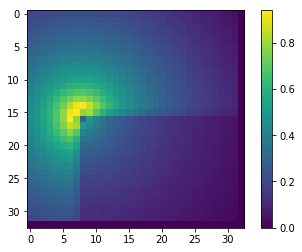

In [32]:
plt.imshow(SolnArray - soln)
plt.colorbar(orientation='vertical')
plt.show()